# **Постановка задачи**

Найти наиболее перспективный жанр игры для потенциальной разработки.

# **Загрузка данных**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')  # Подгружаем файл в ноутбук
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# **Обработка пустых значений и дубликатов**


In [4]:
# Посмотрим на наличие NaN в более удобном виде
df.isna().value_counts()

Rank   Name   Platform  Year   Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
False  False  False     False  False  False      False     False     False     False        False           16291
                        True   False  False      False     False     False     False        False             249
                        False  False  True       False     False     False     False        False              36
                        True   False  True       False     False     False     False        False              22
Name: count, dtype: int64

In [5]:
# Вместо NaN используем Unknown для издателя. Это самый логичный вариант для заполнения
df['Publisher'] = df['Publisher'].fillna('Unknown')
df.isna().value_counts()

Rank   Name   Platform  Year   Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
False  False  False     False  False  False      False     False     False     False        False           16327
                        True   False  False      False     False     False     False        False             271
Name: count, dtype: int64

In [6]:
# Проверим, что NaN'ы в столбце Publisher заполнились словом Unknown
df[df['Publisher'] == 'Unknown'].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00
940,942,Gran Turismo Concept 2001 Tokyo,PS2,2001.0,Racing,Unknown,0.00,1.10,0.42,0.33,1.84
1303,1305,Triple Play 99,PS,NaN,Sports,Unknown,0.81,0.55,0.00,0.10,1.46
1649,1651,NASCAR Thunder 2003,PS2,NaN,Racing,Unknown,0.60,0.46,0.00,0.16,1.22
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,Unknown,0.87,0.32,0.00,0.02,1.21


In [7]:
# Приведём год к типу integer (это логичнее, чем float). Конкретнее - к Int64, который пропустит NaN'ы 
# Считаем, что NaN - это неизвестный год издания
df['Year'] = df['Year'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
# Проверим на наличие дубликатов
df.duplicated().value_counts()
#  Дубликатов нет

False    16598
Name: count, dtype: int64

In [9]:
# Посмотрим на основные статистические показатели
df.describe().round(2)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.0,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.0,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.0,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.0,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.0,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.0,41.49,29.02,10.22,10.57,82.74


# **Продажи игр, в зависимости от жанра**

In [10]:
# Год меняется от 1980 до 2020. Мы хотим узнать наиболее перспективный жанр для разработки игры, поэтому
# строки с неизвестным годом будет лучше удалить, так как, возможно, это довольно старые игры и уже не 
# актуальны
print(df.shape)
df.dropna(subset='Year', inplace=True)
df.shape

(16598, 11)


(16327, 11)

In [11]:
# Посмотрим как менялись продажи жанров с течением времени
df.groupby('Genre')['Genre'].value_counts().count()  # Количество уникальных жанров. Оно равно 12 
genres = sorted(list(df['Genre'].unique()))  # Кстати его можно было вычислить как len(genres). Так лучше.
genres

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [12]:
# Построим распределение продаж в зависимости от года для каждого жанра. В случае отсутствия
# продаж в какой-то год появятся NaN'ы. Их мы заменим на нули, что логично для нашей задачи.
dfg = df.groupby(['Genre', 'Year']).agg({'Global_Sales': np.sum}).unstack().fillna(0)
dfg

/tmp/ipykernel_102/1397474841.py:3: FutureWarning: The provided callable <function sum at 0x7e2dd01ef6d0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dfg = df.groupby(['Genre', 'Year']).agg({'Global_Sales': np.sum}).unstack().fillna(0)


Global_Sales                                                 \
Year                 1980   1981   1982  1983   1984   1985   1986  1987   
Genre                                                                      
Action               0.34  14.84   6.52  2.86   1.85   3.52  13.74  1.12   
Adventure            0.00   0.00   0.00  0.40   0.00   0.00   0.00  4.38   
Fighting             0.77   0.00   0.00  0.00   0.00   1.05   0.00  5.42   
Misc                 2.71   0.00   0.87  2.14   1.45   0.00   0.00  0.00   
Platform             0.00   6.93   5.03  6.93   0.69  43.17   9.39  1.74   
Puzzle               0.00   2.24  10.03  0.78   3.14   3.21   0.00  0.00   
Racing               0.00   0.48   1.57  0.00   5.95   0.00   1.96  0.00   
Role-Playing         0.00   0.00   0.00  0.00   0.00   0.00   2.52  4.65   
Shooter              7.07  10.04   3.79  0.48  31.10   1.00   3.89  0.71   
Simulation           0.00   0.45   0.00  0.00   0.00   0.03   0.00  0.00   
Sports               0.49   0.79   1.05  3.20   6.18   1.96   5.57  3.72   
Strategy             0.00   0.00   0.00  0.00   0.00   0.00   0.00  0.00   

                            ...                                          \
Year           1988   1989  ...    2009    2010    2011    2012    2013   
Genre                       ...                                           
Action         1.75   4.64  ...  139.36  117.64  118.96  122.04  125.22   
Adventure      0.00   0.00  ...   20.68   16.57   15.98    5.99    6.61   
Fighting       0.00   0.00  ...   32.15   14.89   22.68    9.51    7.21   
Misc           0.00   1.28  ...   76.94   96.86   56.08   22.92   25.65   
Platform      27.73  20.66  ...   41.09   31.90   28.11   18.55   25.12   
Puzzle         5.58  37.75  ...   20.31   11.18    5.11    1.76    0.99   
Racing         2.14   0.00  ...   34.19   34.93   35.01   14.46   13.04   
Role-Playing   5.88   2.20  ...   47.90   70.52   53.37   47.81   44.92   
Shooter        0.51   1.20  ...   69.89   77.41   99.36   72.86   62.80   
Simulation     0.03   0.00  ...   33.71   22.15   15.28   13.38    8.67   
Sports         3.60   5.72  ...  138.52   92.53   56.99   30.93   41.55   
Strategy       0.00   0.00  ...   12.56   13.87    9.06    3.33    6.33   

                                               
Year           2014   2015   2016  2017  2020  
Genre                                          
Action        99.02  70.70  19.91  0.01  0.00  
Adventure      6.06   8.03   1.81  0.00  0.00  
Fighting      16.15   7.78   3.86  0.00  0.00  
Misc          23.68  11.69   1.17  0.00  0.00  
Platform       8.89   6.05   2.07  0.00  0.00  
Puzzle         1.50   0.70   0.00  0.00  0.00  
Racing        16.69   7.92   1.64  0.00  0.00  
Role-Playing  45.86  36.44   6.76  0.04  0.00  
Shooter       66.00  66.15  18.22  0.00  0.00  
Simulation     5.55   5.62   0.39  0.00  0.29  
Sports        46.66  41.54  14.60  0.00  0.00  
Strategy       0.99   1.82   0.50  0.00  0.00  

[12 rows x 39 columns]

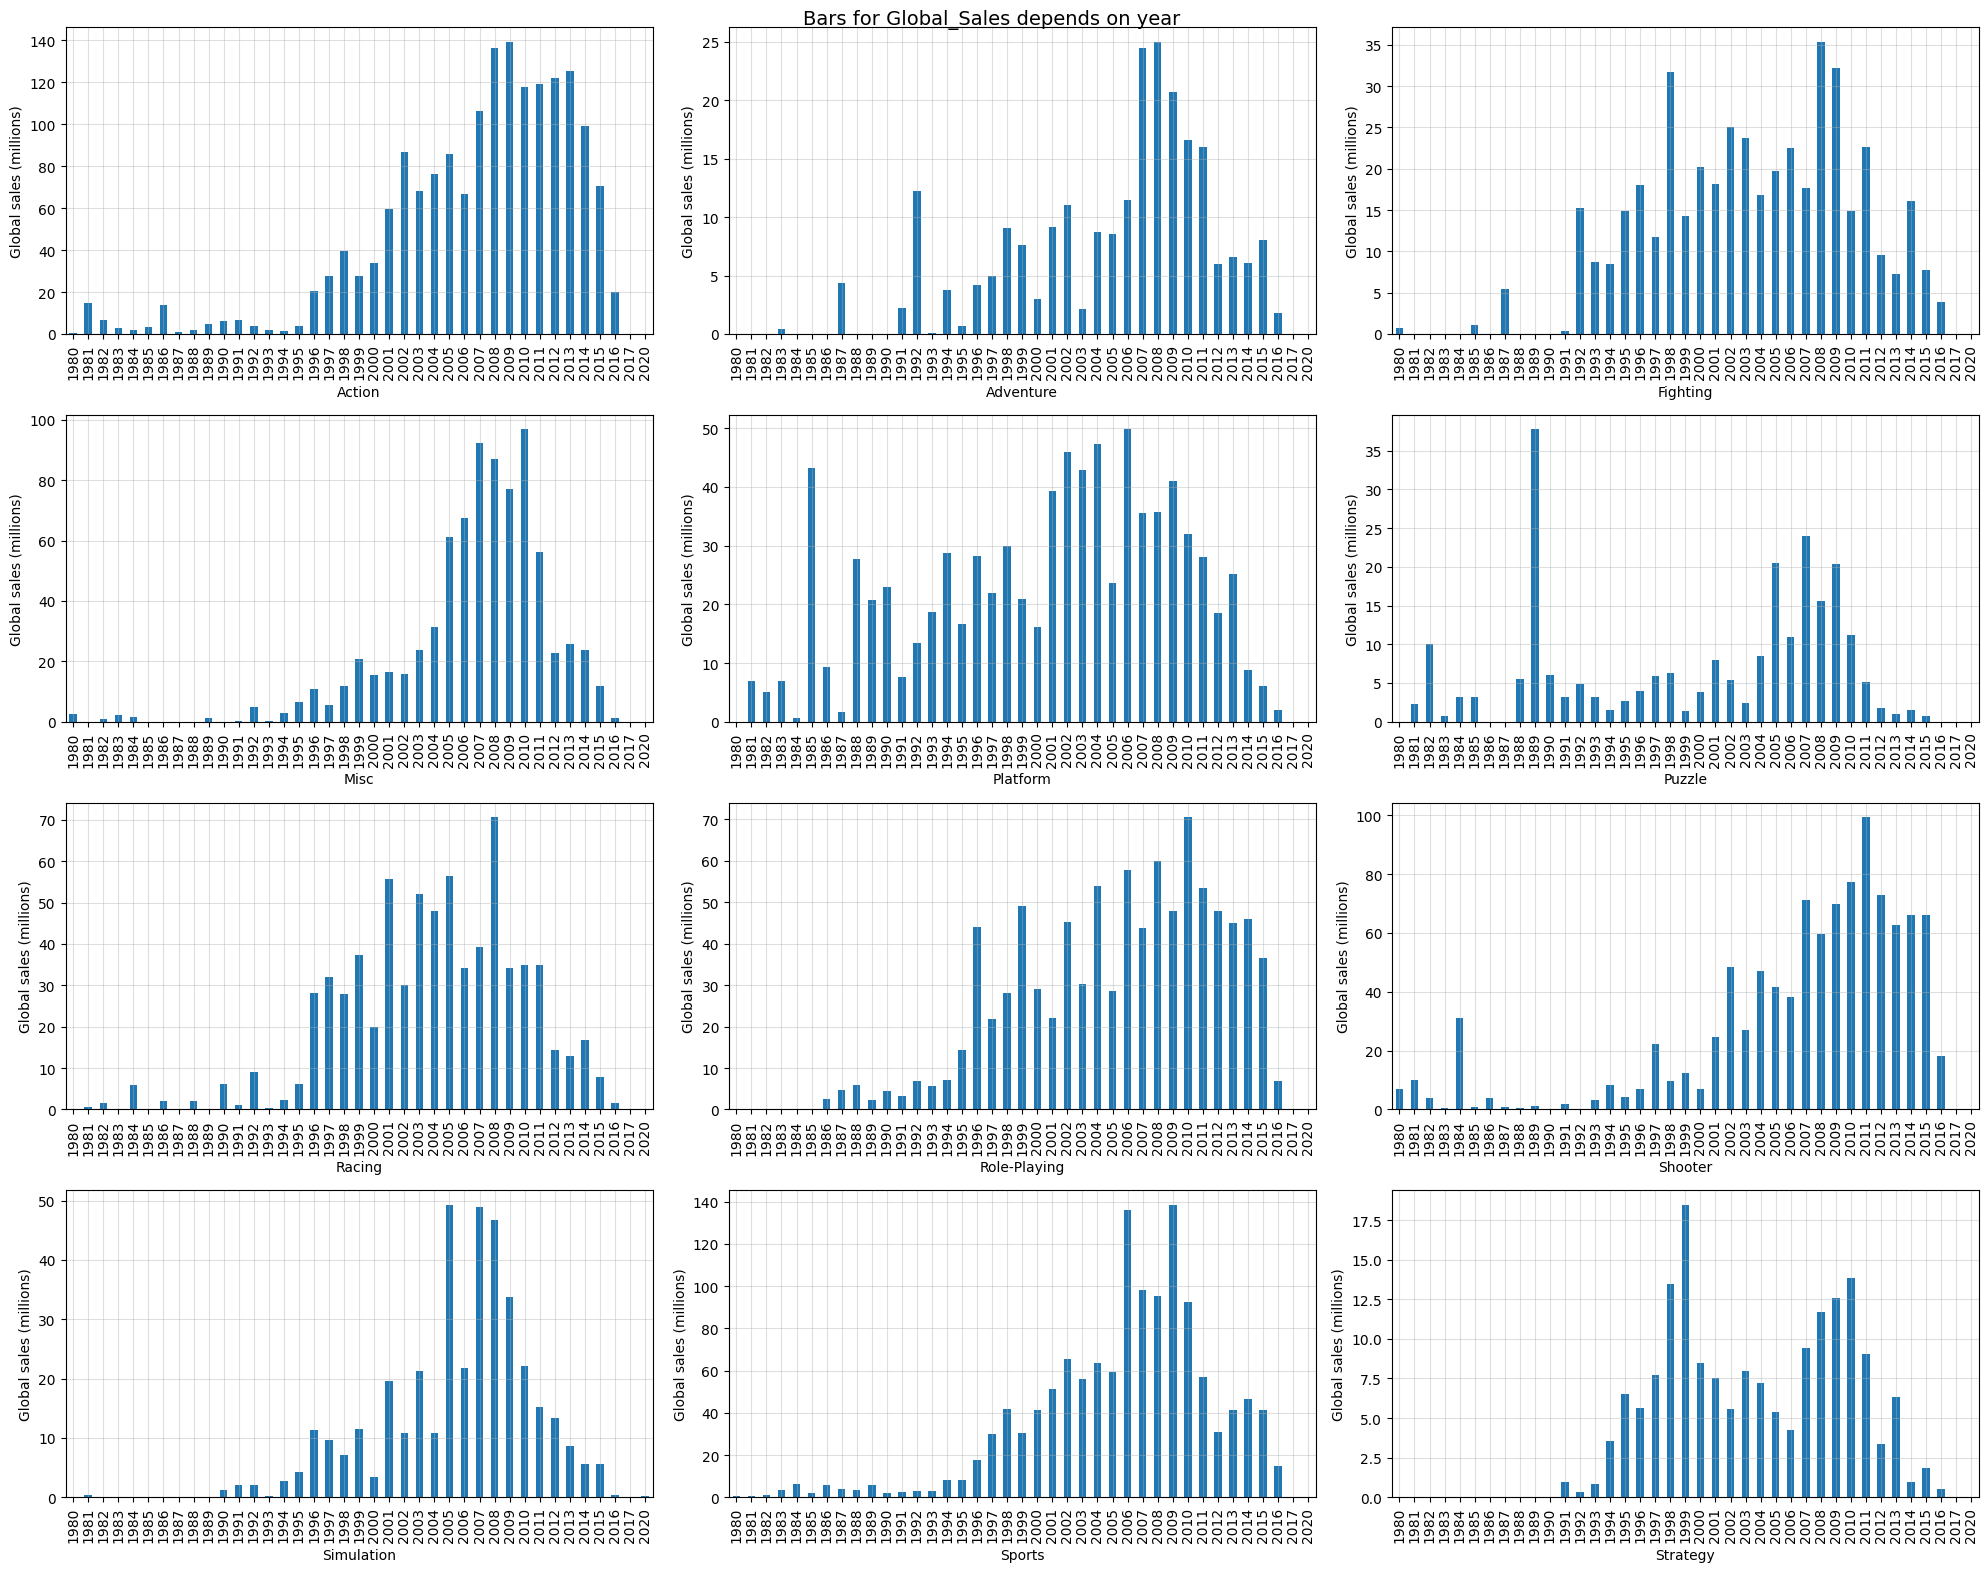

In [13]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (20,16))
plt.suptitle("Bars for Global_Sales depends on year ", fontsize = 14)
j = 1
for i in range(len(genres)):
    plt.subplot(4,3,j)
    ax = dfg['Global_Sales'].iloc[i].plot.bar()
    ax.set_xlabel(genres[i])
    ax.set_ylabel('Global sales (millions)')
    plt.grid(alpha=0.4)
    j +=1
    
plt.tight_layout()
plt.show()

/tmp/ipykernel_102/1048920749.py:5: FutureWarning: The provided callable <function sum at 0x7e2dd01ef6d0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dfg = df[df['Year'] <= 2015].groupby(['Genre', 'Year']).agg({'Global_Sales': np.sum}).unstack().fillna(0)


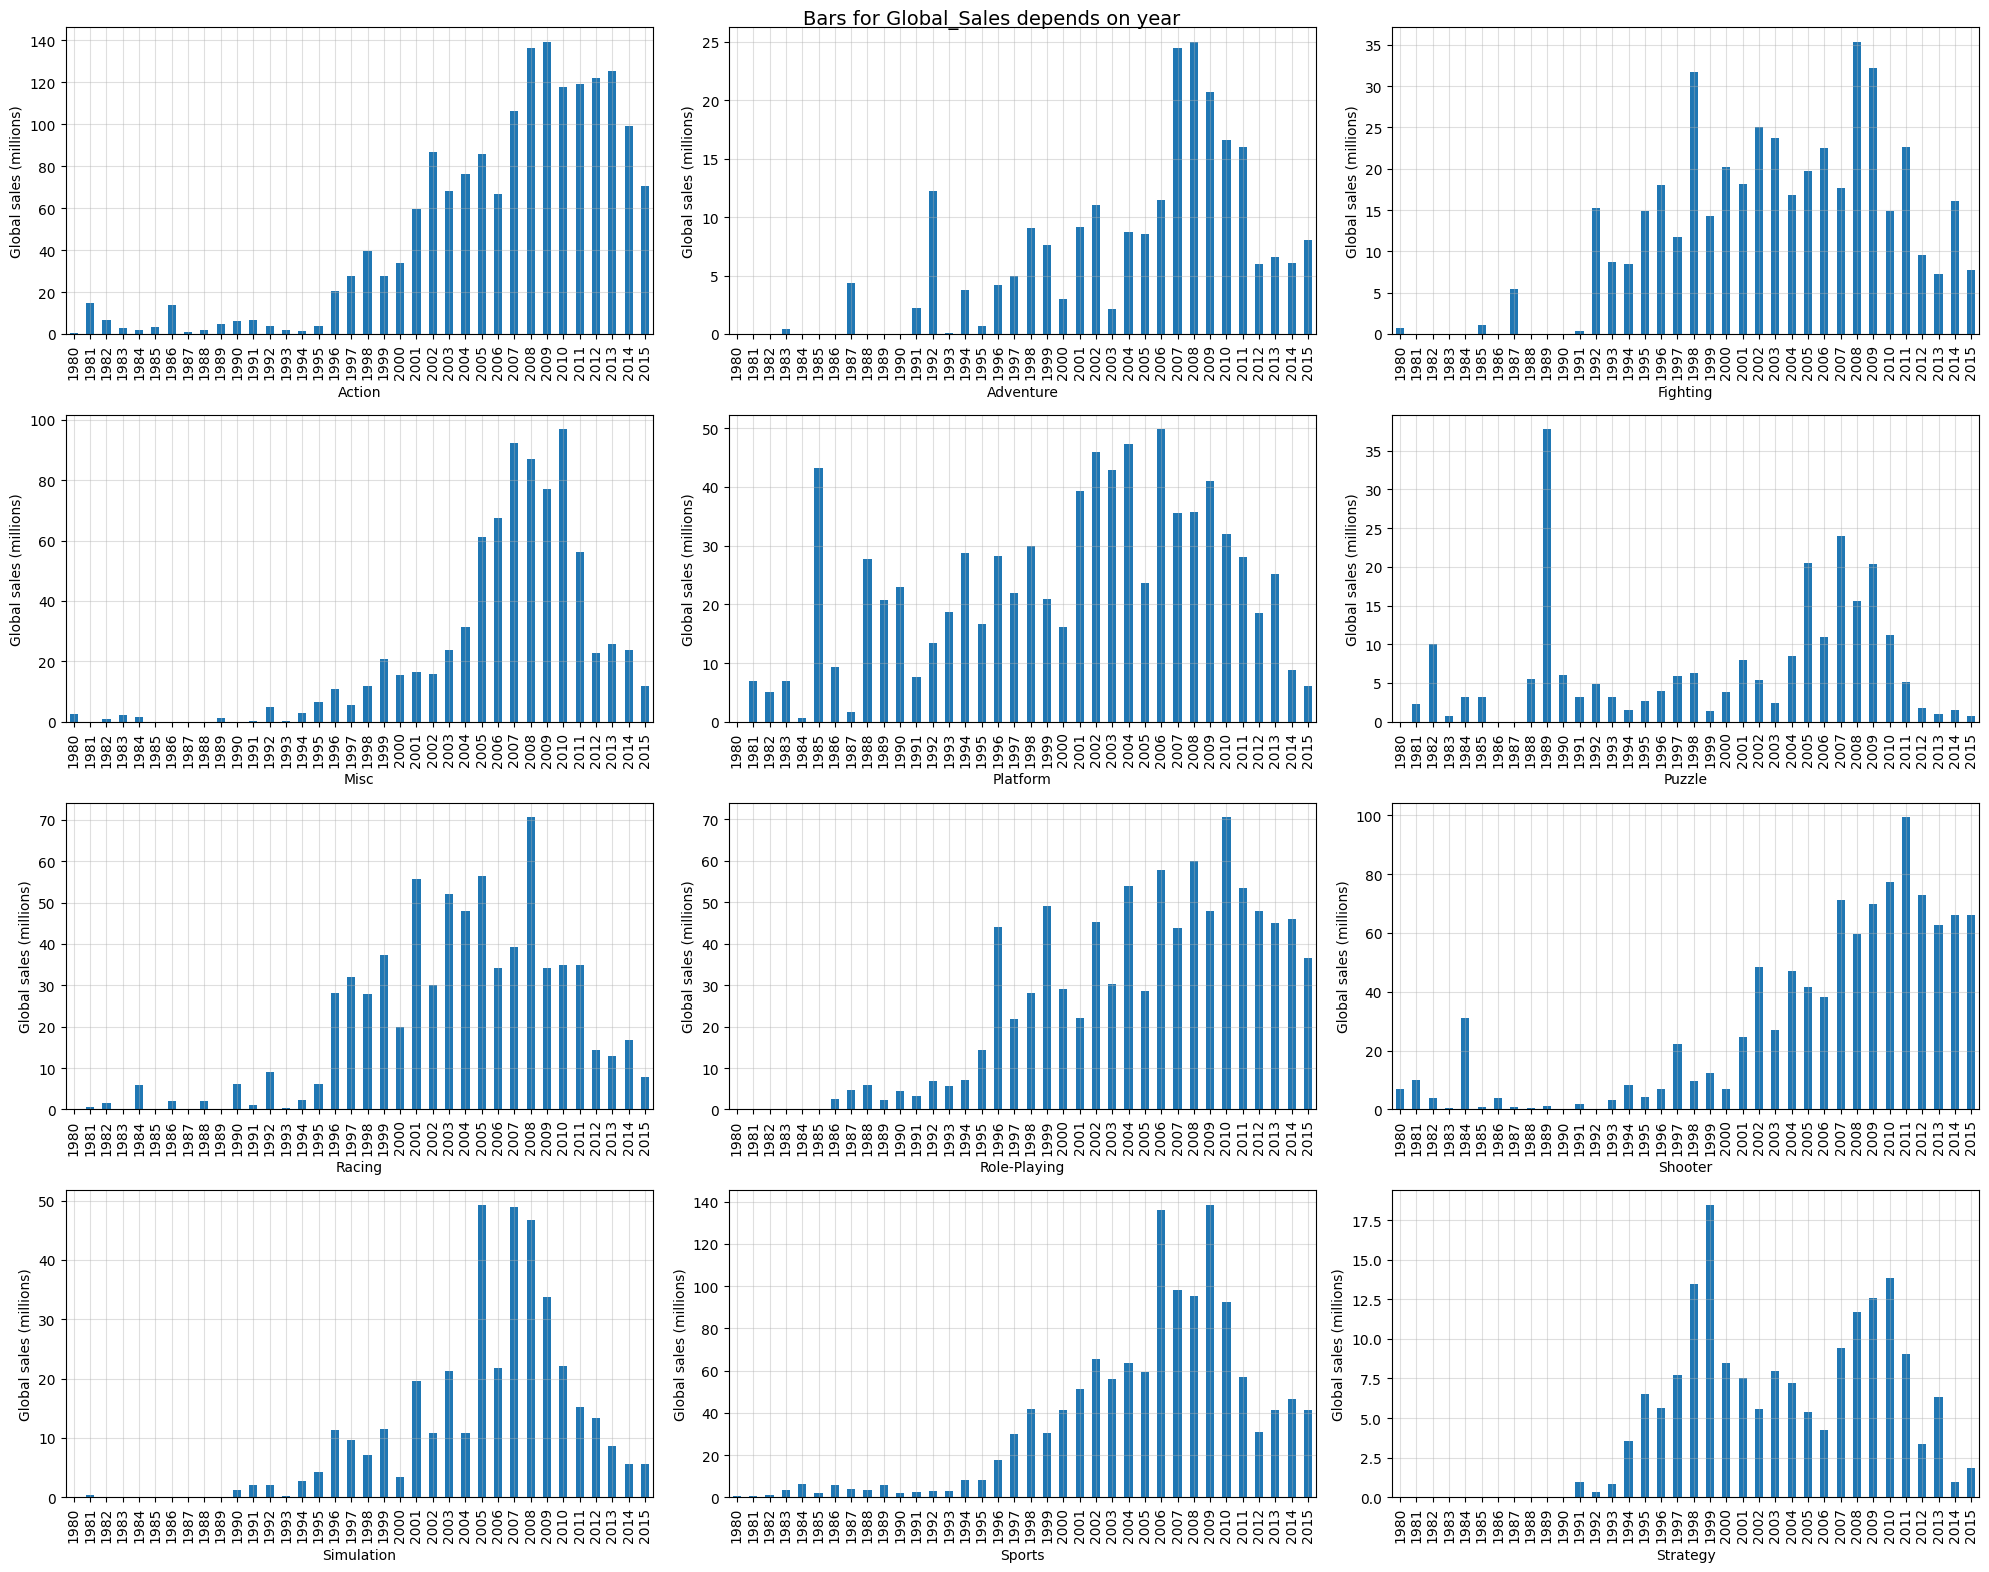

In [14]:
# Заметим, что начиная с 2017 года данных о продажах нет, а в 2016 году эти данные судя по всему собраны
# не за весь год, так как даже при высоких продажах в прошлые года, как у жанров Shooter и Role-Playing
# в 2016 году продаж мало. Поэтому рассмотрим данные только до 2015 года включительно.

dfg = df[df['Year'] <= 2015].groupby(['Genre', 'Year']).agg({'Global_Sales': np.sum}).unstack().fillna(0)
fig = plt.figure(figsize = (20,16))
plt.suptitle("Bars for Global_Sales depends on year ", fontsize = 14)
j = 1
for i in range(len(genres)):
    plt.subplot(4,3,j)
    ax = dfg['Global_Sales'].iloc[i].plot.bar()
    ax.set_xlabel(genres[i])
    ax.set_ylabel('Global sales (millions)')
    plt.grid(alpha=0.4)
    j +=1
    
plt.tight_layout()
plt.show()

Из графиков видно, что в последние годы популярны игры в жанрах Action, Shooter. В последние годы (8 лет) у них у единственных стабильно продажи на уровне выше 60 млн.
Также можно заметить, что в течение всего времени стабильно увеличиваются продажи игр в жанре Role-Playing. Возможно, это хороший жанр чтобы сделать игру (требуется дополнительная проверка).

# **Стоит ли создавать игру в жанре Role-Playing?**

In [25]:
# Создадим функцию для выделения годов, в которых были высокие продажи игр в жанре Role-Playing
def highlight_value(value, color='red'):
    if value in [1996, 1999, 2002, 2004, 2006, 2008, 2010]:
        return f'background-color: {color}'
    return None

In [26]:
table = pd.concat([df[(df['Genre'] == 'Role-Playing') & (df['Year'] == i)].sort_values('Global_Sales', ascending=False)[['Name', 'Publisher', 'Year', 'Global_Sales']].head(3) for i in range(1996, 2015)])
table.style.applymap(highlight_value)

/tmp/ipykernel_102/3506659094.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  table.style.applymap(highlight_value)


,Name,Publisher,Year,Global_Sales
4,Pokemon Red/Pokemon Blue,Nintendo,1996,31.370000
762,Super Mario RPG: Legend of the Seven Stars,Nintendo,1996,2.140000
1159,Diablo,Activision,1996,1.590000
66,Final Fantasy VII,Sony Computer Entertainment,1997,9.720000
630,Final Fantasy Tactics,SquareSoft,1997,2.450000
1451,SaGa Frontier,SquareSoft,1997,1.350000
30,Pokémon Yellow: Special Pikachu Edition,Nintendo,1998,14.640000
673,Dragon Warrior Monsters,Eidos Interactive,1998,2.350000
785,Parasite Eve,SquareSoft,1998,2.100000
12,Pokemon Gold/Pokemon Silver,Nintendo,1999,23.100000


Из этой таблицы видно, что довольно высокие продажи во многих годах связаны с выходом игры Pokemon. У всех остальных игр в большинстве случаев продажи заметно меньше. Значит делать игру в жанре Role-Playing не стоит

# **Платформа для разработки игры**

In [78]:
# Ответим дополнительно на вопрос о том, какая платформа больше всего подходит для потенциальной 
# разработки игры (с точки зрения выручки с продаж)
dff = df[(df['Genre'] == 'Action') | (df['Genre'] == 'Shooter')]
dff = dff.groupby(['Genre', 'Platform']).agg({'Global_Sales': np.sum})

/tmp/ipykernel_102/2373642052.py:2: FutureWarning: The provided callable <function sum at 0x7e2dd01ef6d0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dff = dff.groupby(['Genre', 'Platform']).agg({'Global_Sales': np.sum})


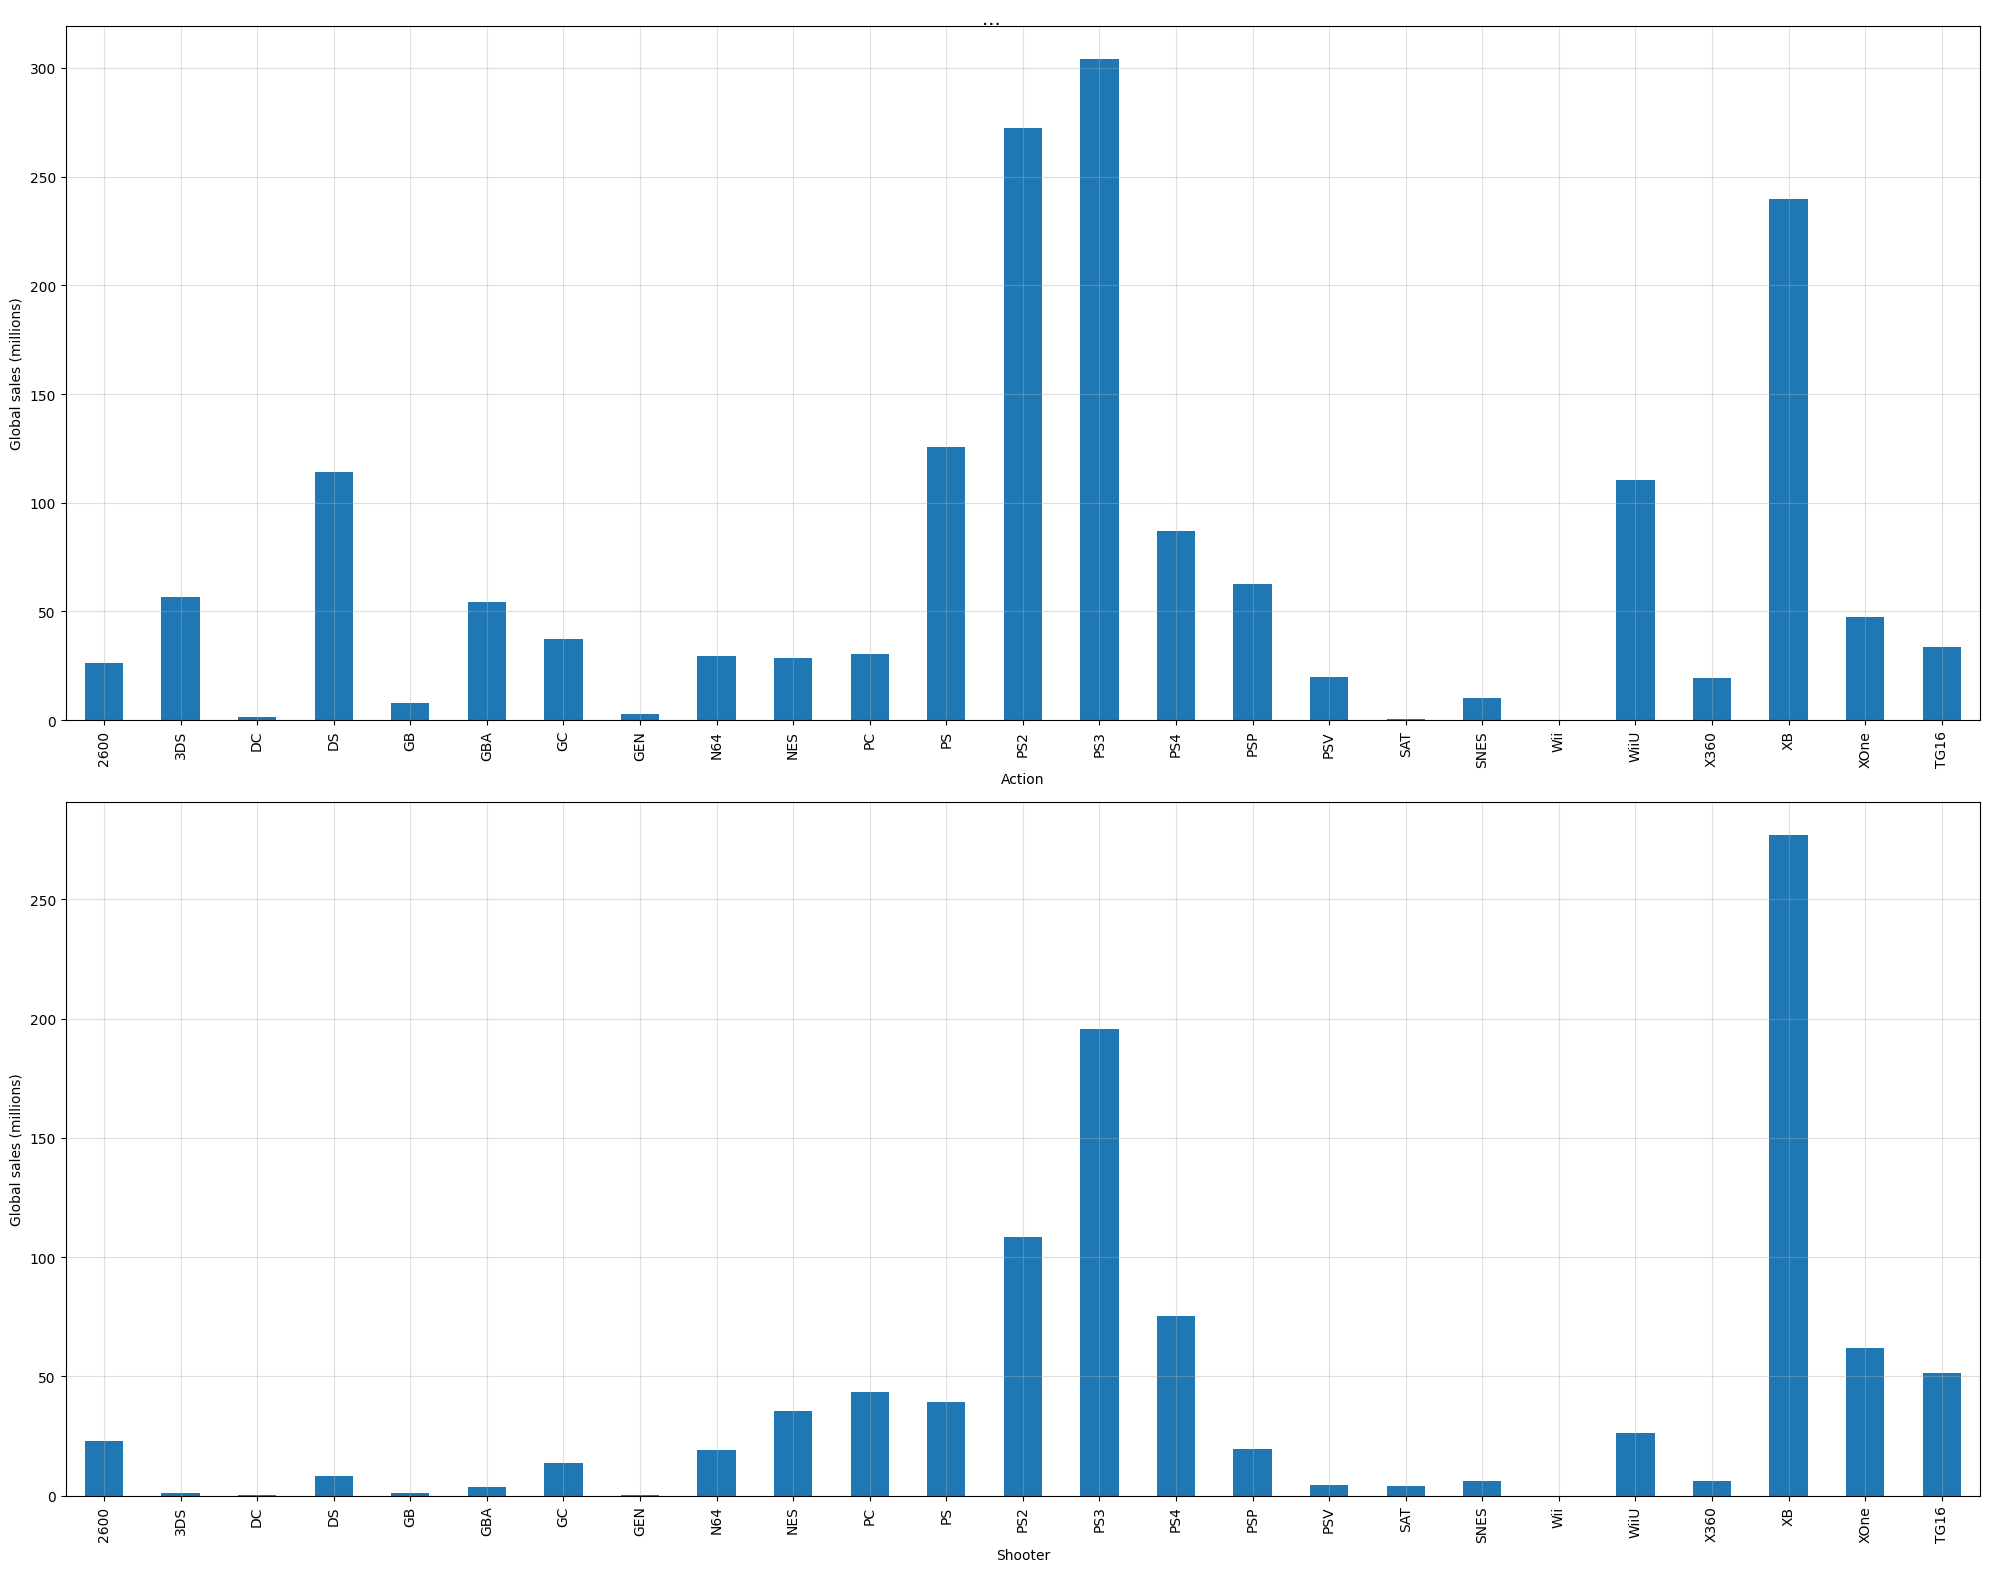

In [79]:
popular_genres = ['Action', 'Shooter']
fig = plt.figure(figsize = (20,16))
plt.suptitle("... ", fontsize = 14)
j = 1
for i in range(2):
    plt.subplot(2,1,j)
    ax = dff['Global_Sales'].unstack(sort=False).iloc[i].plot.bar()
    ax.set_xlabel(popular_genres[i])
    ax.set_ylabel('Global sales (millions)')
    plt.grid(alpha=0.4)
    j +=1
    
plt.tight_layout()
plt.show()

Из графиков видно, что за всё время консоли гораздо популярнее для игр, нежели пк. Причём чем новее консоль, тем больше продаж. Поэтому лучше писать игру для последнего поколения консолей

# **Матрица корреляции**

[]

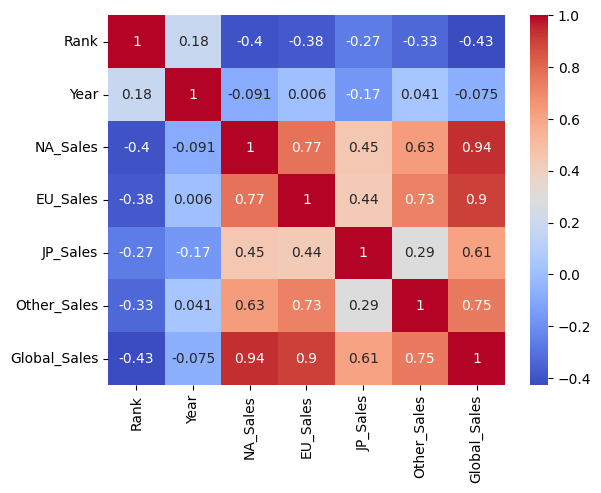

In [27]:
# Построим матрицу корреляции.
import seaborn as sns
numerical_data = df.select_dtypes(include=[np.number])
sns.heatmap(data=numerical_data.corr(), annot=True, cmap='coolwarm')  # annot - отображение чисел
plt.plot()

Из матрицы корреляции видна заметная линейная зависимость (по модулю больше 0.8) между глобальными продажами и продажами в Северной Америке (NA) и Европе (EU). Судя по всему это означает, что Европа и Северная Америка являются основными "игроманами", и если хочется сделать игру для какой-то страны, то стоит ориентироваться на страны Северной Америки и Европы

# **Итоговый вывод**

Стоит делать игру в жанре Action или Shooter для консолей последнего поколения. Лучше всего игры продаются в Европе и Северной Америке.